In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Rohit Bhapkar\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Rohit Bhapkar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Rohit Bhapkar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Rohit Bhapkar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.qvlo2t66wepi7jz63ps3hmohfey472bc.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
train = pd.read_csv("trainset.csv")
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [5]:
train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,652.704082,657.475653,647.433700,652.657015,652.657015,2.414928e+06
std,175.630574,176.627416,174.732814,175.820993,175.820993,1.672160e+06
min,350.053253,350.391052,345.512787,349.164032,349.164032,7.900000e+03
25%,528.287079,532.615204,524.232483,528.429413,528.429413,1.336900e+06
50%,600.002563,603.236511,594.453674,598.005554,598.005554,1.842300e+06
75%,774.015015,779.120025,768.662506,772.720001,772.720001,3.090850e+06
max,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,2.328310e+07


In [6]:
train.shape

(1259, 7)

# Plotting


<AxesSubplot:>

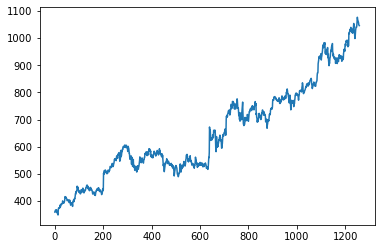

In [7]:
#plot closing price
train['Adj Close'].plot()
# plt.title(f"Closing Price of Google")


Text(0.5, 1.0, 'Shares Traded')

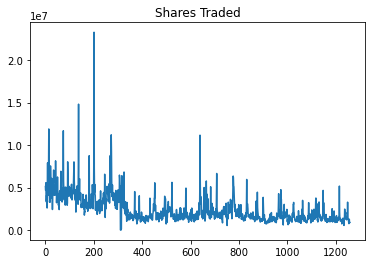

In [7]:
#Volume Plot
train['Volume'].plot()
plt.title(f"Shares Traded")

<AxesSubplot:>

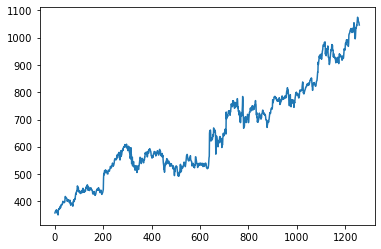

In [10]:
train['Open'].plot()

In [8]:
train=train.iloc[:,1:2].values
train

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
train=sc.fit_transform(train)
train

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [10]:
x_train= train[0:1257]
y_train= train[1:1258]

In [11]:
x_train=np.reshape(x_train, (1257 , 1 , 1))

In [12]:
x_train

array([[[0.01011148]],

       [[0.01388614]],

       [[0.01690727]],

       ...,

       [[0.9805695 ]],

       [[0.97637719]],

       [[0.97543954]]])

In [13]:
x_train.shape

(1257, 1, 1)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(4, activation= 'sigmoid', input_shape= (None,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 0.1456
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0951
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0505
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0494
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0483
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0460
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 2ms/step - loss: 2.0186e-04
Epoch 101/200
40/40 [==============================] - 0s 2ms/step - loss: 2.0164e-04
Epoch 102/200
40/40 [==============================] - 0s 2ms/step - loss: 2.0153e-04
Epoch 103/200
40/40 [==============================] - 0s 2ms/step - loss: 2.0148e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 2.0049e-04
Epoch 105/200
40/40 [==============================] - 0s 2ms/step - loss: 2.0135e-04
Epoch 106/200
40/40 [==============================] - 0s 2ms/step - loss: 2.0085e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 2.0006e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 1.9923e-04
Epoch 109/200
40/40 [==============================] - 0s 2ms/step - loss: 1.9842e-04
Epoch 110/200
40/40 [==============================] - 0s 2ms/step - loss: 1.9837e-04
Epoch 111/200
40/40 [==============================] - 0s 2ms/step -

In [23]:
# testset
test_set = pd.read_csv('testset.csv')
real_stock_price = test_set.iloc[:,1:2].values

In [24]:
real_stock_price.shape

(125, 1)

In [25]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (125 , 1, 1))

In [26]:
prediction = model.predict(inputs)
prediction = sc.inverse_transform(prediction)

4/4 [==============================] - 0s 2ms/step


In [27]:
prediction

array([[1037.4772 ],
       [1051.254  ],
       [1071.3564 ],
       [1076.3837 ],
       [1083.2363 ],
       [1089.1658 ],
       [1078.9707 ],
       [1086.6068 ],
       [1083.3856 ],
       [1108.0171 ],
       [1102.9257 ],
       [1107.1288 ],
       [1107.468  ],
       [1112.0267 ],
       [1129.7991 ],
       [1143.4264 ],
       [1139.7078 ],
       [1141.6855 ],
       [1142.7692 ],
       [1136.0493 ],
       [1138.1841 ],
       [1131.9663 ],
       [1099.4933 ],
       [1073.5382 ],
       [1018.951  ],
       [1065.9148 ],
       [1043.5984 ],
       [1010.15216],
       [1037.1821 ],
       [1034.5735 ],
       [1038.0067 ],
       [1063.8262 ],
       [1071.7009 ],
       [1073.513  ],
       [1086.7472 ],
       [1094.7458 ],
       [1091.8326 ],
       [1104.2075 ],
       [1115.0338 ],
       [1100.3324 ],
       [1087.9037 ],
       [1041.5848 ],
       [1060.4939 ],
       [1080.7358 ],
       [1072.3556 ],
       [1094.0326 ],
       [1110.829  ],
       [1132.

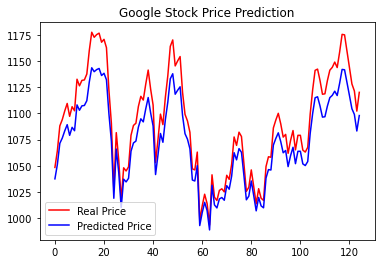

In [28]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Price')
plt.plot( prediction , color = 'blue' , label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.legend()